# Fast Fourier Transform ELLIS333
## Audio samples from a Church Organ in Vancouver
### Alastair McLean

With sound files from the great Edward Norman of various church organs around Vancouver. This code is a modified version of sample code from effbot.org

http://effbot.org/librarybook/aifc.htm

- The sampwidth is the size of each sample in bytes. This is converted to bits below. 
- The samplingrate is the number of times a second the audio file is sampled.
- nframes is the number of samples that were taken

In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import aifc
%matplotlib inline

global data
global wave
global f
global dt

### Functions that could be placed in the vibs and wavs module

In [2]:
def w(f):
    return 2*np.pi * f

In [3]:
def powerspectrum(real, imag):
    return np.sqrt(real**2+imag**2)

In [4]:
def getthesoundfile(stringy):
    a = aifc.open(stringy, "r")

    if a.getnchannels() == 1:
        print("mono,"),
    else:
        print("stereo,"),
    
    sampwidth = a.getsampwidth()*8 
    samplingrate = a.getframerate()
    nframes = a.getnframes()
    data = a.readframes(nframes)

    factor = 2.0 # gives the correct frequency for my recordings  
    dt = 1/(factor*samplingrate)   

    print(sampwidth , "bits,")
    print("Sampling rate =", samplingrate, "Hz" )
    print("Sampling interval = {:6.3e} s".format(dt))
    print("Size of audio file =", len(data), "bytes")
    
    return data, dt

**converttonumpyarray** converts the audio file into a numpy array. I use the shape command to see how many samples (points) are in the audio file. I also divide the data set by the maximum value because the absolute amplitude of the wave is not important in this example. 

In [5]:
def converttonumpyarray(data):
    y = np.fromstring(data, np.short).byteswap()
    y = y/y.max()
    print('shape of the numpy array =', y.shape)
    return y

**calculatethepowerspectrum** The Fourier transform of the wave is calculated. This has a real and an imaginary part. To plot the power spectrum we have to calculate the modulus of the complex number. 

In [6]:
def calculatepowerspectrum(wave):
    wavefft = fftpack.fft(wave)                      # FFT of the wave
    f = fftpack.fftfreq(wave.size, dt)               # frequencies 
    f = fftpack.fftshift(f)                          # shift frequencies from min to max
    wavefftshift = fftpack.fftshift(wavefft)         # shift wavefft order to correspond to f
    power = powerspectrum(np.real(wavefftshift), np.imag(wavefftshift))  # calculate the power spectrum
    power = power/np.max(power)
    return power, f

**plottheaudiofile**

In [7]:
def plotaudiofile(np_data):
    plt.figure(0, figsize=(10, 4))
    plt.plot(np_data, label = 'Audio')
    plt.legend(loc='upper right')
    plt.show()

**plotthepowerspectrum** Makes some plot.

In [8]:
def plotpowerspectrum(t, power, startfrequency, stopfrequency, save, name):
    fig = plt.figure(2, figsize=(14,6))
    plt.plot(t, power, color='blue', label='power spectrum')
    plt.legend(loc='upper right')
    plt.xlabel('frequency / Hz', fontsize = 16)
    plt.ylabel('power', fontsize = 16)
    #plt.ylim(0, 45000)
    plt.grid(True)
    plt.xlim(startfrequency, stopfrequency)
    if save == False:
        plt.savefig(name) 
    plt.show()

**truncateaudiofile**

In [9]:
def truncate(somefile, initial, final):
    tmp = somefile[initial: final]
    return tmp

### The analysis

I've recorded stops on the Great manual and Pedal division and then flute stops on both the Great and the Positiv manuals. There should be distinctive differences between the foundational "principal" tone and flute-based voicing, which is what I'm interested in.  I pressed the same key for all the manual stops, but of course their pipe length (8', 4' or 16') determined their octave pitch.

The original recording was done at 48kHz 24bit - I'm not sure how much AIFF detracts from that through compression.  If I haven't done this correctly, don't hesitate to let me know.

In [10]:
#change the location string to correspond to the location where you have placed the sound files.
location = "../audio/"
sf1 = "great-div-4-inch-flute.aif"
sf2 = "great-div-8-inch-principal.aif"
sf3 = "pedal-div-16-inch-principal.aif"
sf4 = "pedal-div-16-sub-bass.aif"
sf5 = "positiv-div-4-inch-flute.aif"
sf6 = "positiv-div-8-inch-flute.aif"
sf7 = "trumpet-D.aiff"
sf8 = "trumpet-G.aiff"

### great-div-4-inch-flute

In [11]:
data, dt = getthesoundfile(location+sf1)
np_data = converttonumpyarray(data)
#plotaudiofile(np_data)

stereo,
24 bits,
Sampling rate = 48000 Hz
Sampling interval = 1.042e-05 s
Size of audio file = 1456128 bytes
shape of the numpy array = (728064,)


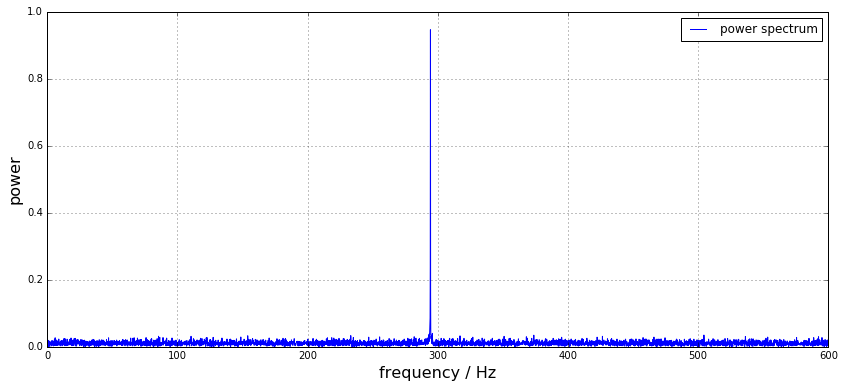

In [12]:
truncated_data = truncate(np_data, 5000, len(np_data))
power_data, f = calculatepowerspectrum(truncated_data)
plotpowerspectrum(f, power_data, startfrequency = 0.0, stopfrequency = 600, save = False, name ="06-great-div-4-inch-flute.pdf")

### great-div-8-inch-principal

In [13]:
data, dt = getthesoundfile(location+sf2)
np_data = converttonumpyarray(data)
#plotaudiofile(np_data)

stereo,
24 bits,
Sampling rate = 48000 Hz
Sampling interval = 1.042e-05 s
Size of audio file = 1729536 bytes
shape of the numpy array = (864768,)


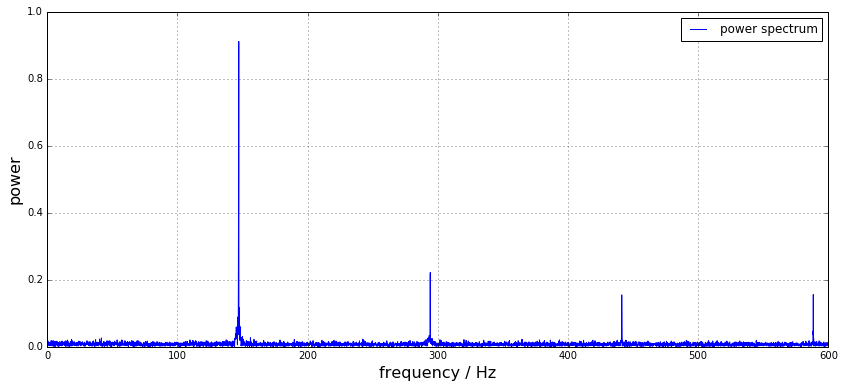

In [14]:
truncated_data = truncate(np_data, 10000, len(np_data))
power_data, f = calculatepowerspectrum(truncated_data)
plotpowerspectrum(f, power_data, startfrequency = 0.0, stopfrequency = 600, save = False, name ="06-great-div-8-inch-principal.pdf")

### pedal-div-16-inch-principal

In [15]:
data, dt = getthesoundfile(location+sf3)
np_data = converttonumpyarray(data)
#plotaudiofile(np_data)

stereo,
24 bits,
Sampling rate = 48000 Hz
Sampling interval = 1.042e-05 s
Size of audio file = 1560576 bytes
shape of the numpy array = (780288,)


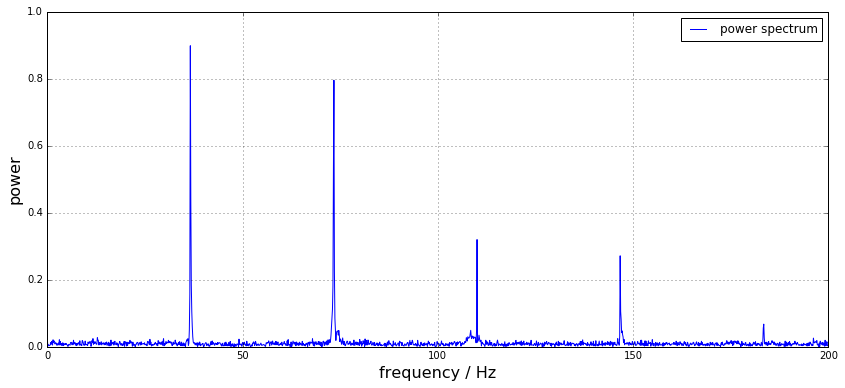

In [16]:
truncated_data = truncate(np_data, 10000, len(np_data))
power_data, f = calculatepowerspectrum(truncated_data)
plotpowerspectrum(f, power_data, startfrequency = 0.0, stopfrequency = 200, save = False, name ="06-pedal-div-16-inch-principal.pdf")